In [4]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Read Dataframes

df=pd.read_csv('/content/drive/My Drive/Dataset/norne_production_rate_sample.csv',
               index_col=0,parse_dates=True)
df.head()

,Rate (SCF/d)
Date,
2004-04-01,2706039.0
2004-05-01,2492086.2
2004-06-02,1816846.1
2004-07-02,1920207.4
2004-07-04,1683521.4


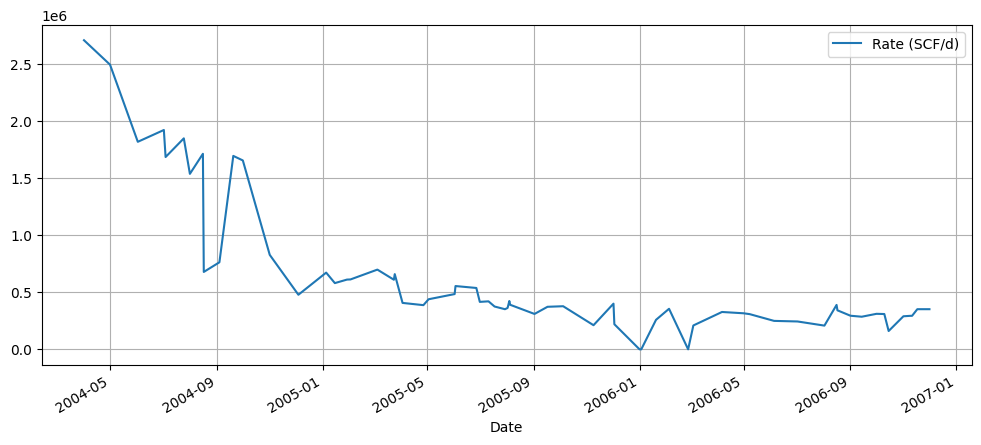

In [7]:
#Plot The data
df.plot(figsize=(12,5))
plt.grid()

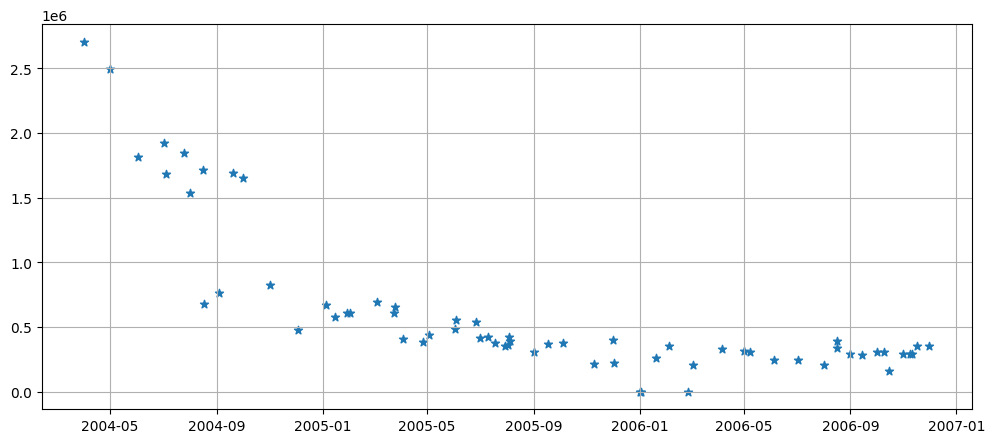

In [8]:
#Scatter Plot

plt.figure(figsize=(12,5))
plt.scatter(y=df["Rate (SCF/d)"],x=df.index,marker="*")
plt.grid()

In [9]:
#Convert dates into days
def day_marker(df):
  days=[]
  for d in range(len(df)):
    delta=df.index[d]-df.index[0]
    days.append(delta.days)
  days=np.array(days)
  return days

In [10]:
#Call Day Function
df["days"]=day_marker(df)
df.head()

,Rate (SCF/d),days
Date,,
2004-04-01,2706039.0,0
2004-05-01,2492086.2,30
2004-06-02,1816846.1,62
2004-07-02,1920207.4,92
2004-07-04,1683521.4,94


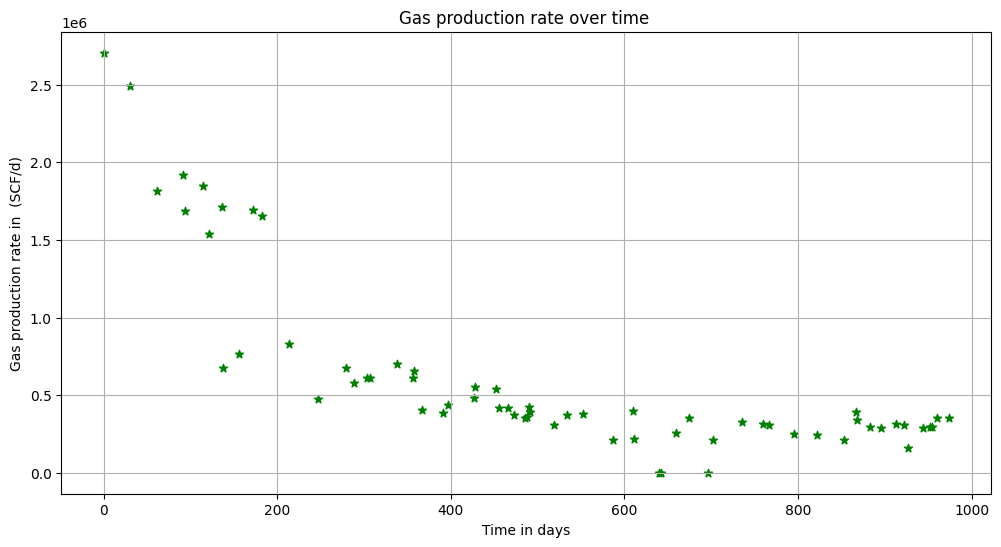

In [11]:
#Scatter Plot of Production Data
plt.figure(figsize=(12,6))
plt.scatter(df["days"],df["Rate (SCF/d)"],marker="*",color="green")
plt.xlabel("Time in days")
plt.ylabel("Gas production rate in  (SCF/d)")
plt.title("Gas production rate over time ")
plt.grid()
plt.show()

Curve Fitting Using Scipy

In [12]:
#Import curve_fit from scipy libraries
from scipy.optimize import curve_fit

In [13]:
#Curve Fittibg Steps:-
#1.Define the equation
#2.Call curve_fit(equation,x,y)
#3.Now plot the graph


def q_hyp(t,qi,b,d):
  q=qi/(np.power(1+b*d*t*np.power(qi,b),1/b))
  return q

def hyp_fitter(q,t):
#Normalisation since q value is too large -->bring in between 0 t0 1`
  q_n=q/max(q)
  t_n=t/max(t)

#Curve fitting
  params=curve_fit(q_hyp,t_n,q_n)
  [qi,b,d]=params[0]

  #De-normalisation
  d_f=d/max(t)
  qi_f=qi*max(q)

  q_hyp_fit=q_hyp(t_n,qi_f,b,d_f)
  return q_hyp_fit,params

In [14]:
q=df["Rate (SCF/d)"]
t=df["days"]
q_fit,params=hyp_fitter(q,t)


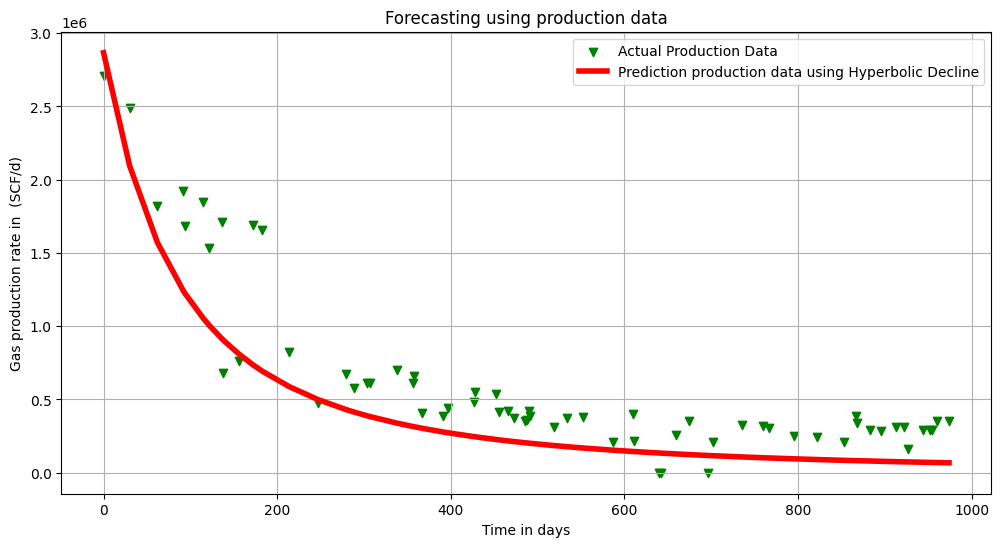

In [15]:
#Plotting
plt.figure(figsize=(12,6))
plt.scatter(t,q,marker="v",color="green",label="Actual Production Data ")
plt.plot(t,q_fit,label="Prediction production data using Hyperbolic Decline",lw=4,c="red")
plt.grid()
plt.legend()
plt.title("Forecasting using production data")
plt.xlabel("Time in days")
plt.ylabel("Gas production rate in  (SCF/d)")
plt.show()